# Predicting House Prices

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import src.helper as hlp

In [3]:
# Store constants/column names needed for Kaggle submission
idx_col = 'Id'
target_col = 'SalePrice'

## EDA

### Load Train Data

In [4]:
train_df = pd.read_csv('data/train.csv')

In [5]:
# Preview data
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Get Column Info

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Data Field Descriptions
```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

### Get Amount of Nulls

In [7]:
missing_data = hlp.get_nulls(train_df)
missing_data.head(19)

,Total,Percent,Type
PoolQC,1453,0.995205,object
MiscFeature,1406,0.963014,object
Alley,1369,0.937671,object
Fence,1179,0.807534,object
FireplaceQu,690,0.472603,object
LotFrontage,259,0.177397,float64
GarageCond,81,0.055479,object
GarageType,81,0.055479,object
GarageYrBlt,81,0.055479,float64
GarageFinish,81,0.055479,object


#### Strategy to handle nulls (19 cols)
1. Drop cols > 15% null (Top 6)
2. Drop 'Garage', 'Bsmt', and 'MasVnr' cols (12)
3. Keep 'Electrical' since only 1, replace NaN with 'None'

In [8]:
# Store selected null cols to be dropped later
null_cols = list(missing_data.head(18).index)
null_cols

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageCond',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrArea',
 'MasVnrType']

### Get Unique Counts

In [9]:
hlp.print_unique_ct(train_df)

Count of Unique Values per Column:

Id: 1460
MSSubClass: 15
MSZoning: 5
LotFrontage: 111
LotArea: 1073
Street: 2
Alley: 3
LotShape: 4
LandContour: 4
Utilities: 2
LotConfig: 5
LandSlope: 3
Neighborhood: 25
Condition1: 9
Condition2: 8
BldgType: 5
HouseStyle: 8
OverallQual: 10
OverallCond: 9
YearBuilt: 112
YearRemodAdd: 61
RoofStyle: 6
RoofMatl: 8
Exterior1st: 15
Exterior2nd: 16
MasVnrType: 5
MasVnrArea: 328
ExterQual: 4
ExterCond: 5
Foundation: 6
BsmtQual: 5
BsmtCond: 5
BsmtExposure: 5
BsmtFinType1: 7
BsmtFinSF1: 637
BsmtFinType2: 7
BsmtFinSF2: 144
BsmtUnfSF: 780
TotalBsmtSF: 721
Heating: 6
HeatingQC: 5
CentralAir: 2
Electrical: 6
1stFlrSF: 753
2ndFlrSF: 417
LowQualFinSF: 24
GrLivArea: 861
BsmtFullBath: 4
BsmtHalfBath: 3
FullBath: 4
HalfBath: 3
BedroomAbvGr: 8
KitchenAbvGr: 4
KitchenQual: 4
TotRmsAbvGrd: 12
Functional: 7
Fireplaces: 4
FireplaceQu: 6
GarageType: 7
GarageYrBlt: 98
GarageFinish: 4
GarageCars: 5
GarageArea: 441
GarageQual: 6
GarageCond: 6
PavedDrive: 3
WoodDeckSF: 274
OpenPo

### Get Object Columns

In [10]:
obj_cols = hlp.get_cols_of_type(train_df, 'object')

object Columns (43): 
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [11]:
train_df[obj_cols].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### Get Number Columns

In [12]:
num_cols = hlp.get_cols_of_type(train_df, 'number')

number Columns (38): 
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [13]:
train_df[num_cols].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [14]:
# sns.pairplot(train_df[num_cols].sample(700))

### Getting to know the target - SalePrice

In [15]:
train_df[target_col].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.8829
Kurtosis: 6.5363


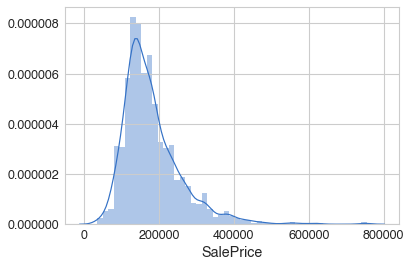

In [16]:
# histogram
hlp.plot_hist(train_df, target_col)

### Analyze scatterplots of variables against target

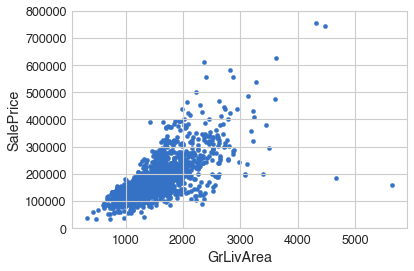

In [17]:
var = 'GrLivArea'
hlp.plot_scatter(train_df, var, target_col)

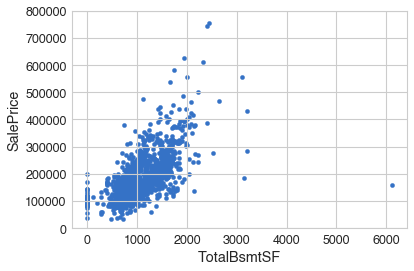

In [18]:
var = 'TotalBsmtSF'
hlp.plot_scatter(train_df, var, target_col)

### Analyze boxplots of variables against target

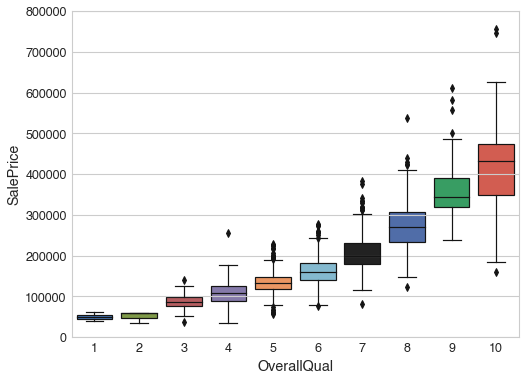

In [19]:
var = 'OverallQual'
hlp.plot_boxplot(train_df, var, target_col)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

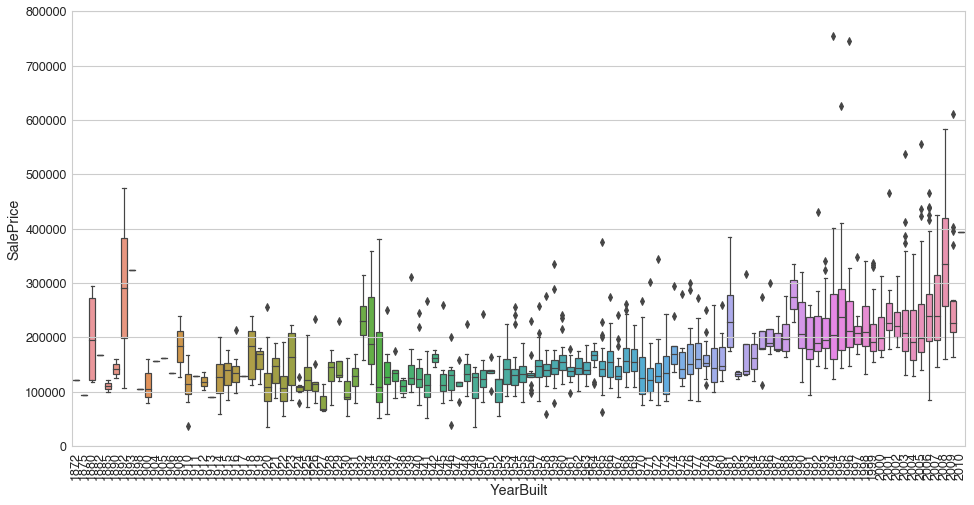

In [20]:
var = 'YearBuilt'
hlp.plot_boxplot(train_df, var, target_col, figsize=(16, 8))
plt.xticks(rotation=90)

### Find correlations

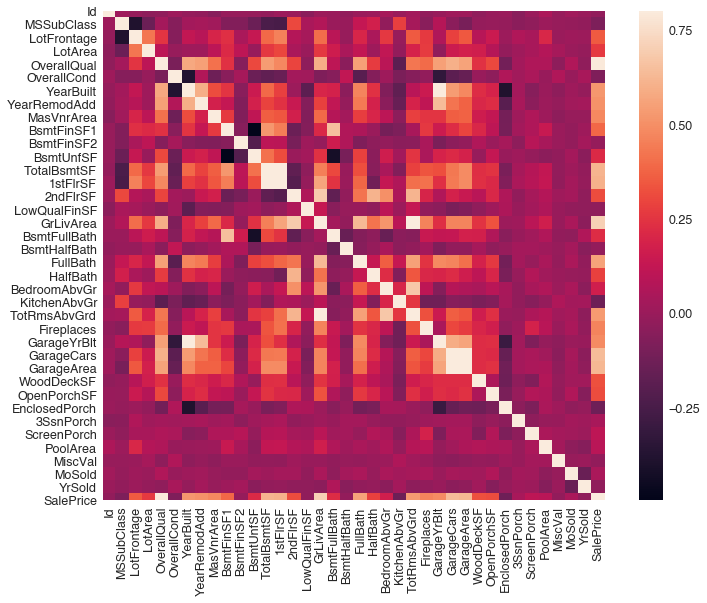

In [21]:
# correlation matrix
hlp.plot_corr(train_df)

#### Zoom in on top 10 correlations

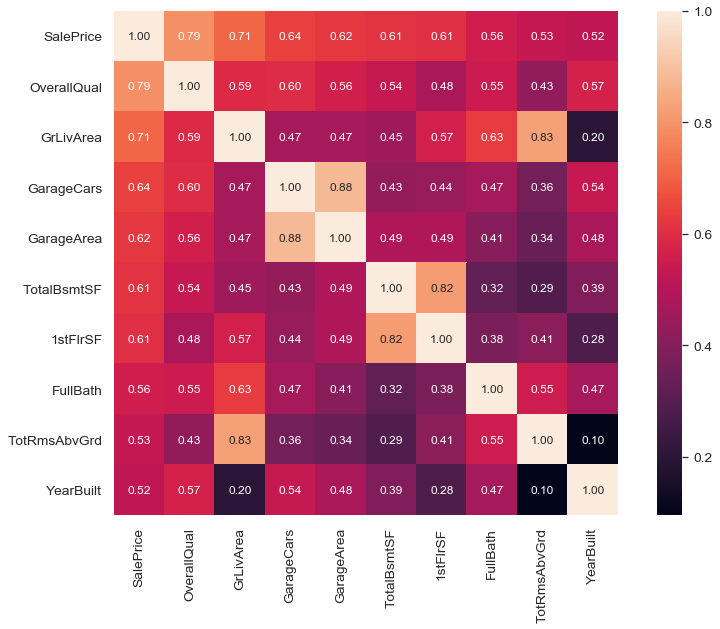

In [22]:
hlp.plot_target_corr(train_df, target_col, num_vars=10)

#### Strong Correlations:
1. OverallQual
2. GrLivArea
3. GarageCars

~~GarageArea~~ (multicolinearity)

4. TotalBasementSF

~~1stFlrSF~~ (multicolinearity)

5. FullBath

~~TotRmsAbvGrd~~ (multicolinearity)

6. YearBuilt
    * *Need careful time-series analysis*

### Plot scatter matrix of selected top variables

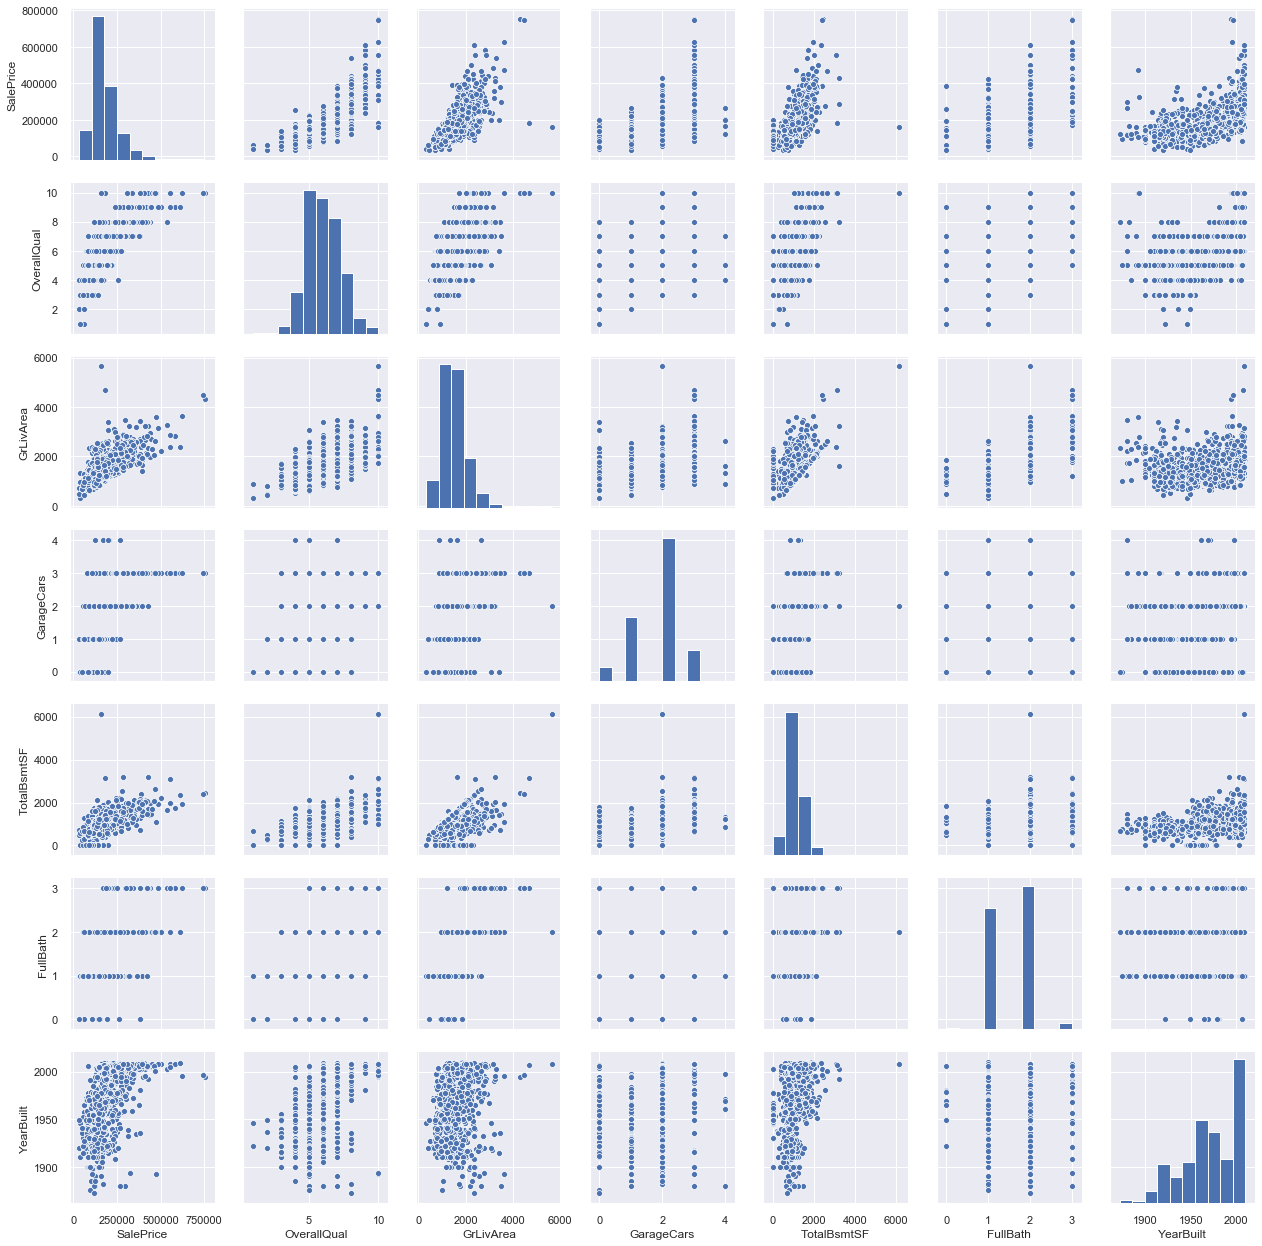

In [23]:
hicorr_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
cols = [target_col] + hicorr_cols
hlp.plot_scattermatrix(train_df, cols, height=2.5)

## Data Pre-Processing

### Load Test Data

In [24]:
test_df = pd.read_csv('data/test.csv')
test_idx = test_df[idx_col]

### One-Hot Encode Obj Cols, Impute Means/Drop Cols for Null Numbers

In [25]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [26]:
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [27]:
# Check for cols with nulls
train_df.columns[train_df.isnull().sum() > 0]
# test_df.columns[test_df.isnull().sum() > 0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [28]:
# Encode and impute in train & test with pipeline
train_df_encoded, test_df_encoded = hlp.pipeline_initial(train_df, test_df, target_col)
train_df_encoded.head()

object Columns (43): 
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
int64 Columns (35): 
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'E

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_is_ConLw,SaleType_is_New,SaleType_is_Oth,SaleType_is_WD,SaleCondition_is_Abnorml,SaleCondition_is_AdjLand,SaleCondition_is_Alloca,SaleCondition_is_Family,SaleCondition_is_Normal,SaleCondition_is_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
# Check again for cols with nulls
train_df_encoded.columns[train_df_encoded.isnull().sum() > 0]

Index([], dtype='object')

In [30]:
train_df_encoded.shape, test_df_encoded.shape

((1460, 305), (1459, 304))

In [31]:
# Cols determined to be dropped earlier due to too many nulls
null_cols
train_df_encoded_cleaned = hlp.drop_cols(train_df_encoded, null_cols)
test_df_encoded_cleaned = hlp.drop_cols(test_df_encoded, null_cols)

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageCond',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrArea',
 'MasVnrType']

In [32]:
train_df_encoded_cleaned.shape, test_df_encoded_cleaned.shape

((1460, 302), (1459, 301))

In [33]:
# Final check for cols with nulls
train_df_encoded_cleaned.columns[train_df_encoded_cleaned.isnull().sum() > 0]
# test_df_encoded_cleaned.columns[test_df_encoded_cleaned.isnull().sum() > 0]

Index([], dtype='object')

### Finding Outliers

### Standardize Target
* To a mean of 0 and a standard deviation of 1

In [34]:
hlp.standardize_data(train_df_encoded_cleaned, target_col)

After standadizing SalePrice:

outer range (10 lowest) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (10 highest) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


### Remove Outliers

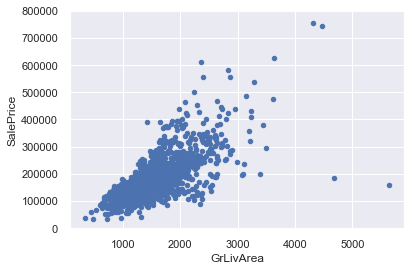

In [35]:
hlp.plot_scatter(train_df_encoded_cleaned, 'GrLivArea', target_col, ylim=(0,800000))

In [36]:
train_df_encoded_cleaned[[idx_col, 'GrLivArea', target_col]].sort_values('GrLivArea', ascending=False).head()

,Id,GrLivArea,SalePrice
1298,1299,5642,160000
523,524,4676,184750
1182,1183,4476,745000
691,692,4316,755000
1169,1170,3627,625000


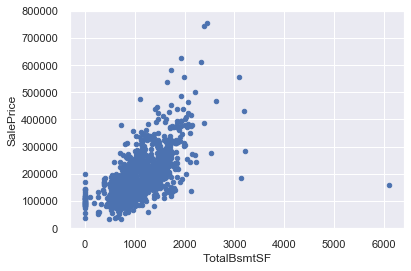

In [37]:
hlp.plot_scatter(train_df_encoded_cleaned, 'TotalBsmtSF', target_col, ylim=(0,800000))

In [38]:
train_df_encoded_cleaned[[idx_col, 'TotalBsmtSF', target_col]].sort_values('TotalBsmtSF', ascending=False).head()

,Id,TotalBsmtSF,SalePrice
1298,1299,6110,160000
332,333,3206,284000
496,497,3200,430000
523,524,3138,184750
440,441,3094,555000


#### Outliers to remove (by Id):
1. 1299
2. 524

In [39]:
outliers = [1299, 524]

In [40]:
train_df_encoded_cleaned[[idx_col, 'GrLivArea', target_col]].sort_values('GrLivArea', ascending=False).head()

,Id,GrLivArea,SalePrice
1298,1299,5642,160000
523,524,4676,184750
1182,1183,4476,745000
691,692,4316,755000
1169,1170,3627,625000


In [41]:
train_df_encoded_cleaned = hlp.remove_outliers(train_df_encoded_cleaned, outliers, idx_col)

In [42]:
train_df_encoded_cleaned[[idx_col, 'GrLivArea', target_col]].sort_values('GrLivArea', ascending=False).head()

,Id,GrLivArea,SalePrice
1182,1183,4476,745000
691,692,4316,755000
1169,1170,3627,625000
185,186,3608,475000
304,305,3493,295000


## Modeling

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score

### Before Data Wrangling

### 1. Baseline Model - Linear Regression with few features, original train data

In [44]:
#### Split y from Train Data
y_train = hlp.split_y_from_df(target_col, train_df)
y_train.shape

(1460,)

In [45]:
# Baseline Features: year and month of sale, lot square footage, and number of bedrooms
baseline_cols = ['MoSold', 'YrSold', 'LotArea', 'BedroomAbvGr']
X_train_baseline = train_df[baseline_cols].to_numpy()
X_test_baseline = test_df[baseline_cols].to_numpy()
# Fit default Linear Regression
lr_baseline = LinearRegression()

hlp.fit_pred_score_Nfold(lr_baseline, X_train_baseline, y_train, X_test_baseline, test_idx, target_col, model_name='Baseline Linear Regression', csv='lr_baseline')

Baseline Linear Regression RMSLE, 10-fold CV on Train Data: 0.383


### 2. After Data Wrangling - *ALL Features*

### Decision Tree Models

### A. Default Decision Tree

In [46]:
#### Split X/y from one-hot encoded, cleaned data
X_train_full, y_train_full = hlp.split_Xy_from_df(target_col, train_df_encoded_cleaned)
X_test_full = test_df_encoded_cleaned.to_numpy()

In [47]:
# Fit default Decision Tree
dt_default = DecisionTreeRegressor()

hlp.fit_pred_score_Nfold(dt_default, X_train_full, y_train_full, X_test_full, test_idx, target_col, model_name='Default Decision Tree, All Features', csv='dt_default_af')

Default Decision Tree, All Features RMSLE, 10-fold CV on Train Data: 0.195


### Ensemble Models

### B. Default Random Forest

In [48]:
# Fit default Random Forest
rf_default = RandomForestRegressor(n_estimators=100)

In [49]:
hlp.fit_pred_score_Nfold(rf_default, X_train_full, y_train_full, X_test_full, test_idx, target_col, model_name='Default Random Forest, All Features', csv='rf_default_af')

Default Random Forest, All Features RMSLE, 10-fold CV on Train Data: 0.138


In [50]:
feature_list = list(train_df_encoded_cleaned.drop(columns=[target_col]).columns)

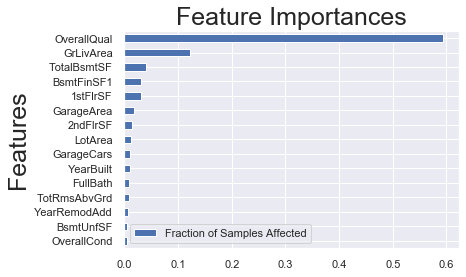

In [51]:
feature_list = train_df_encoded_cleaned.drop(columns=[target_col]).columns
plt, rev_sort_feature_cols = hlp.plot_topN_features(rf_default.feature_importances_, feature_list, 15)

In [52]:
rf_top15 = list(rev_sort_feature_cols[:15])
rf_top15

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 'BsmtFinSF1',
 '1stFlrSF',
 'GarageArea',
 '2ndFlrSF',
 'LotArea',
 'GarageCars',
 'YearBuilt',
 'FullBath',
 'TotRmsAbvGrd',
 'YearRemodAdd',
 'BsmtUnfSF',
 'OverallCond']

### C. Default Gradient Boosting Regressor

In [53]:
# Fit default Gradient Boosting Regressor
gb_default = GradientBoostingRegressor()

In [54]:
hlp.fit_pred_score_Nfold(gb_default, X_train_full, y_train_full, X_test_full, test_idx, target_col, model_name='Default Gradient Boost, All Features', csv='gb_default_af')

Default Gradient Boost, All Features RMSLE, 10-fold CV on Train Data: 0.124


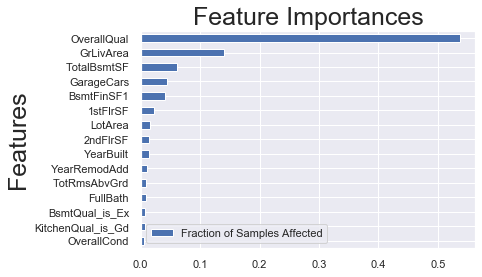

In [55]:
plt, rev_sort_feature_cols = hlp.plot_topN_features(gb_default.feature_importances_, feature_list, 15)

In [56]:
gb_top15 = list(rev_sort_feature_cols[:15])
gb_top15

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 'GarageCars',
 'BsmtFinSF1',
 '1stFlrSF',
 'LotArea',
 '2ndFlrSF',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'FullBath',
 'BsmtQual_is_Ex',
 'KitchenQual_is_Gd',
 'OverallCond']

### D. XGBoost!!

In [81]:
import xgboost as xgb

In [84]:
xgb_reg = xgb.XGBRegressor()
hlp.fit_pred_score_Nfold(xgb_reg, X_train_full, y_train_full, X_test_full, test_idx, target_col, model_name='Default XGBoost, All Features', csv='xgb_default_af')

[17:02:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:02:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:02:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:02:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:02:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:02:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:02:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:02:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:02:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

### More Linear Regression Models

### E. Default Linear Regression

In [58]:
# Linear Regression doesn't work yet, need to remove problematic features
# hlp.fit_pred_score_Nfold(lr_baseline, X_train_full, y_train_full, X_test_full, test_idx, target_col, model_name='Default Linear Regression, All Features', csv='lr_default_af')

### 3. After Data Wrangling - *Limited Features*

### A. Trying "Most Important" features from default rf, gb

In [59]:
most_important_feats = list(set(rf_top15 + gb_top15))
print('Number of important features selected:', len(most_important_feats))
most_important_feats

Number of important features selected: 17


['OverallCond',
 '1stFlrSF',
 'GarageCars',
 'GrLivArea',
 'GarageArea',
 'YearBuilt',
 'BsmtQual_is_Ex',
 'KitchenQual_is_Gd',
 'OverallQual',
 'FullBath',
 'TotalBsmtSF',
 '2ndFlrSF',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'LotArea',
 'BsmtUnfSF',
 'BsmtFinSF1']

In [60]:
# Remove features that showed multicolinearity earlier in EDA
multicolinear = ['GarageArea', '1stFlrSF', 'TotRmsAbvGrd']
most_important_feats = list(set(most_important_feats) - set(multicolinear))
print('Final number of important features selected:', len(most_important_feats))
most_important_feats

Final number of important features selected: 14


['GarageCars',
 'GrLivArea',
 'KitchenQual_is_Gd',
 'BsmtQual_is_Ex',
 'OverallQual',
 'FullBath',
 'TotalBsmtSF',
 'YearRemodAdd',
 'BsmtUnfSF',
 'BsmtFinSF1',
 'OverallCond',
 'YearBuilt',
 '2ndFlrSF',
 'LotArea']

In [61]:
train_df_encoded_cleaned[most_important_feats].head()

,GarageCars,GrLivArea,KitchenQual_is_Gd,BsmtQual_is_Ex,OverallQual,FullBath,TotalBsmtSF,YearRemodAdd,BsmtUnfSF,BsmtFinSF1,OverallCond,YearBuilt,2ndFlrSF,LotArea
0,2,1710,1.0,0.0,7,2,856,2003,150,706,5,2003,854,8450
1,2,1262,0.0,0.0,6,2,1262,1976,284,978,8,1976,0,9600
2,2,1786,1.0,0.0,7,2,920,2002,434,486,5,2001,866,11250
3,3,1717,1.0,0.0,7,1,756,1970,540,216,5,1915,756,9550
4,3,2198,1.0,0.0,8,2,1145,2000,490,655,5,2000,1053,14260


In [62]:
#### Get only most important features for X Train
X_train_mif = train_df_encoded_cleaned[most_important_feats].to_numpy()
X_test_mif = test_df_encoded_cleaned[most_important_feats].to_numpy()

In [86]:
# models = [lr_baseline, dt_default, rf_default, gb_default]
models = [dt_default, rf_default, gb_default]

for model in models:
    hlp.fit_pred_score_Nfold(model, X_train_mif, y_train_full, X_test_mif, test_idx, target_col)

DecisionTreeRegressor RMSLE, 10-fold CV on Train Data: 0.197
RandomForestRegressor RMSLE, 10-fold CV on Train Data: 0.139
GradientBoostingRegressor RMSLE, 10-fold CV on Train Data: 0.130


In [87]:
hlp.fit_pred_score_Nfold(xgb_reg, X_train_mif, y_train_full, X_test_mif, test_idx, target_col)

[17:03:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:03:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:03:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:03:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:03:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:03:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:03:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:03:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:03:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [64]:
# Linear Regression doesn't work yet, need to remove problematic features
# hlp.fit_pred_score_Nfold(lr_baseline, X_train_mif, y_train_full, X_test_mif, test_idx, target_col)

### 4. Hyperparameter Tuning with GridSearchCV

In [65]:
from sklearn.model_selection import GridSearchCV
import os

### A. Random Forest

#### Limited Features, "Most Important"

In [66]:
tuned_rf = RandomForestRegressor(bootstrap= False, max_depth= None, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 4, n_estimators= 80)
hlp.fit_pred_score_Nfold(tuned_rf, X_train_mif, y_train_full, X_test_mif, test_idx, target_col)

RandomForestRegressor RMSLE, 10-fold CV on Train Data: 0.137


#### ALL Features

In [67]:
tuned_rf = RandomForestRegressor(bootstrap= True, max_depth= None, max_features= None, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 80)
hlp.fit_pred_score_Nfold(tuned_rf, X_train_full, y_train_full, X_test_full, test_idx, target_col)

RandomForestRegressor RMSLE, 10-fold CV on Train Data: 0.138


### B. Gradient Boost

#### Limited Features, "Most Important"

In [68]:
tuned_gb = GradientBoostingRegressor(learning_rate= 0.02, max_depth= 4, max_features= 0.3, min_samples_leaf= 2, n_estimators= 500)
hlp.fit_pred_score_Nfold(tuned_gb, X_train_mif, y_train_full, X_test_mif, test_idx, target_col)

GradientBoostingRegressor RMSLE, 10-fold CV on Train Data: 0.128


#### ALL Features

In [69]:
tuned_gb = GradientBoostingRegressor(learning_rate= 0.05, max_depth= 4, max_features= 0.1, min_samples_leaf= 10, n_estimators= 500)
hlp.fit_pred_score_Nfold(tuned_gb, X_train_full, y_train_full, X_test_full, test_idx, target_col)

GradientBoostingRegressor RMSLE, 10-fold CV on Train Data: 0.117


### C. XGBoost!!

#### Limited Features, "Most Important"

In [69]:
tuned_xgb = xgb.XGBRegressor(min_child_weight= [1, 5, 10],
                 gamma= [0.5, 1, 1.5, 2, 5],
                 subsample= [0.6, 0.8, 1.0],
                 colsample_bytree= [0.6, 0.8, 1.0],
                 max_depth= [3, 4, 5])
hlp.fit_pred_score_Nfold(tuned_xgb, X_train_mif, y_train_full, X_test_mif, test_idx, target_col)

GradientBoostingRegressor RMSLE, 10-fold CV on Train Data: 0.117


#### ALL Features

In [69]:
tuned_xgb = xgb.XGBRegressor(min_child_weight= [1, 5, 10],
                 gamma= [0.5, 1, 1.5, 2, 5],
                 subsample= [0.6, 0.8, 1.0],
                 colsample_bytree= [0.6, 0.8, 1.0],
                 max_depth= [3, 4, 5])
hlp.fit_pred_score_Nfold(tuned_xgb, X_train_full, y_train_full, X_test_full, test_idx, target_col)

GradientBoostingRegressor RMSLE, 10-fold CV on Train Data: 0.117


# Appendix

In [70]:
# don't go beyond here with Run All
assert False

AssertionError: 

### Hyperparameter Tuning with GridSearchCV

### A. Random Forest

#### Limited Features, "Most Important"

In [ ]:
random_forest_grid = {'max_depth': [3, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [10, 20, 40, 80]}

rf_gridsearch = GridSearchCV(RandomForestRegressor(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_log_error')
rf_gridsearch.fit(X_train_mif, y_train_full)

print("best score:", np.sqrt(-rf_gridsearch.best_score_))
print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_
os.system('say "your program has finished"')

#### ALL Features

In [ ]:
random_forest_grid = {'max_depth': [3, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [10, 20, 40, 80]}

rf_gridsearch = GridSearchCV(RandomForestRegressor(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_log_error')
rf_gridsearch.fit(X_train_full, y_train_full)

print("best score:", np.sqrt(-rf_gridsearch.best_score_))
print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_
os.system('say "your program has finished"')

### B. Gradient Boost

#### Limited Features, "Most Important"

In [ ]:
gradient_boost_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
                       'max_depth': [2, 4, 6],
                       'min_samples_leaf': [1, 2, 5, 10],
                       'max_features': [1.0, 0.3, 0.1],
                       'n_estimators': [500]}

gb_gridsearch = GridSearchCV(GradientBoostingRegressor(),
                             gradient_boost_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_log_error')
gb_gridsearch.fit(X_train_mif, y_train_full)

print("best score:", np.sqrt(-gb_gridsearch.best_score_))
print("best parameters:", gb_gridsearch.best_params_)

best_gb_model = gb_gridsearch.best_estimator_
os.system('say "your program has finished"')

#### ALL Features

In [ ]:
gradient_boost_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
                       'max_depth': [2, 4, 6],
                       'min_samples_leaf': [1, 2, 5, 10],
                       'max_features': [1.0, 0.3, 0.1],
                       'n_estimators': [500]}

gb_gridsearch = GridSearchCV(GradientBoostingRegressor(),
                             gradient_boost_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_log_error')
gb_gridsearch.fit(X_train_full, y_train_full)

print("best score:", np.sqrt(-gb_gridsearch.best_score_))
print("best parameters:", gb_gridsearch.best_params_)

best_gb_model = gb_gridsearch.best_estimator_
os.system('say "your program has finished"')

### C. XGBoost!!

#### Limited Features, "Most Important"

In [ ]:
xg_boost_grid = {'min_child_weight': [1, 5, 10],
                 'gamma': [0.5, 1, 1.5, 2, 5],
                 'subsample': [0.6, 0.8, 1.0],
                 'colsample_bytree': [0.6, 0.8, 1.0],
                 'max_depth': [3, 4, 5]}

xgb_gridsearch = GridSearchCV(xgb.XGBRegressor(),
                             xg_boost_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_log_error')
xgb_gridsearch.fit(X_train_mif, y_train_full)

print("best score:", np.sqrt(-xgb_gridsearch.best_score_))
print("best parameters:", xgb_gridsearch.best_params_)

best_xgb_model = xgb_gridsearch.best_estimator_
os.system('say "your program has finished"')

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


/Users/chelsearamos/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min


#### ALL Features

In [ ]:
xg_boost_grid = {'min_child_weight': [1, 5, 10],
                 'gamma': [0.5, 1, 1.5, 2, 5],
                 'subsample': [0.6, 0.8, 1.0],
                 'colsample_bytree': [0.6, 0.8, 1.0],
                 'max_depth': [3, 4, 5]}

xgb_gridsearch = GridSearchCV(xgb.XGBRegressor(),
                             xg_boost_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_log_error')
xgb_gridsearch.fit(X_train_full, y_train_full)

print("best score:", np.sqrt(-xgb_gridsearch.best_score_))
print("best parameters:", xgb_gridsearch.best_params_)

best_xgb_model = xgb_gridsearch.best_estimator_
os.system('say "your program has finished"')

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


/Users/chelsearamos/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.8min


#### Developing One-Hot Encoding Method for All Obj Cols

In [ ]:
train_df_encoded = train_df.copy()
train_df_encoded.head()

In [ ]:
col = obj_cols[0]
col
train_df_obj = train_df[col].fillna('None')
train_df_obj.value_counts()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

col_name = col + '_is_'

# Get object column, fill NaNs with 'None'
train_df_obj = train_df[col].fillna('None')
train_obj_arr = train_df_obj.to_numpy().reshape(-1,1)

# Create one-hot encoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)
ohe.fit(train_obj_arr)    # Assume for simplicity all features are categorical.

# Apply the one-hot encoder
train_obj_encoded = ohe.transform(train_obj_arr)

In [ ]:
cols = [col_name + cat for cat in ohe.categories_[0]]
train_obj_encoded_df = pd.DataFrame(train_obj_encoded, columns=cols)
train_obj_encoded_df.sample(5)
train_obj_encoded_df.columns

In [ ]:
train_df_encoded = train_df_encoded.merge(train_obj_encoded_df, how='left', on=train_df_encoded.index)
train_df_encoded.drop(columns=[col, 'key_0'], inplace=True)
train_df_encoded.head()